 1. Imports & Data (TensorFlow/Keras)

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


 2. Load and Preprocess Data

In [ ]:
# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


3. Model Without Dropout

In [ ]:
model_no_dropout = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

model_no_dropout.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4. Model With Dropout

In [ ]:
model_dropout = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

model_dropout.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


5. Train Models

In [ ]:
history_no_dropout = model_no_dropout.fit(x_train, y_train, validation_split=0.2, epochs=10, verbose=0)
history_dropout = model_dropout.fit(x_train, y_train, validation_split=0.2, epochs=10, verbose=0)


6. Evaluate Models

In [ ]:
print("Without Dropout:")
model_no_dropout.evaluate(x_test, y_test)

print("\nWith Dropout:")
model_dropout.evaluate(x_test, y_test)


Without Dropout:
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9755 - loss: 0.1369

With Dropout:
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9754 - loss: 0.0871


[0.07347310334444046, 0.9793000221252441]

7. Plot Training History

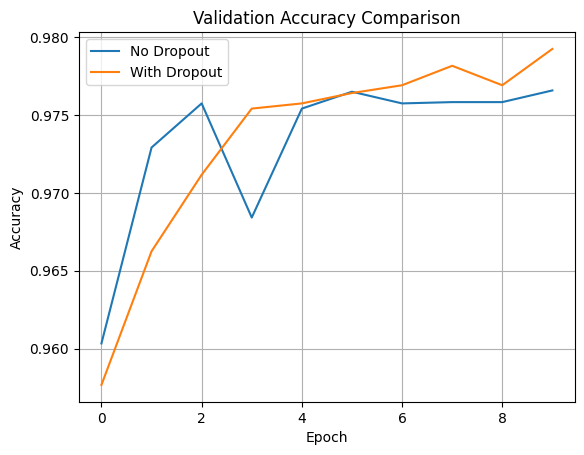

In [ ]:
plt.plot(history_no_dropout.history['val_accuracy'], label='No Dropout')
plt.plot(history_dropout.history['val_accuracy'], label='With Dropout')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
